### Part 1: QFT

1. First lets see the action of DFT on basis state $\vert 0010 \rangle$. In our entire sampling of 16 basis states, we have $x_k = 0$ everywhere except for 1 at $\vert 0010 \rangle$. This 'original' distribution is precisely our expected DFT distribution on $e^{2jx}$.

$$X_k = \sum_{n = 0}^{N-1} x_n e^{ \frac{2 j \pi k n}{N}} \vert k \rangle$$

$$X_k = e^{\frac{4 j \pi k}{16}} \vert k \rangle = e^{- \frac{ j \pi k}{4}} \vert k \rangle$$

This formulation of quantum DFT is actually opposite to classical DFT since the exponent is $e^\frac{2 j \pi k n}{N}$ instead of $e^{-\frac{2 j \pi k n}{N}}$. Hence what we apply here with forward quantum DFT in the circuit is actually classical inverse fourier transform. The set we get is hence the sampling set of a function with pure frequency of (exactly what $e^{2jx}$ is)

Now lets sample $e^{2jx}$ at our 16 points $\frac{k \pi}{8}$ from $k = 0$ to $k = 15$.

Sampling the function yeilds a set = $\{e^{\frac{ j \pi k}{4}}\}$. So the quantum DFT and the sampling of our function yeild similar function. If we want to get original distribution of peak at frequency = 2 from this sample set we will have to do an inverse quantum DFT which is equivalent to a classical forward DFT. So to mathematically get the frequency result of 2 we have to do inverse quantum DFT since the function's discrete sampling resembles quantum DFT of original distribution with peak at 2. 

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

from qiskit.circuit.library import QFT

In [2]:
n_qubits = 4
num_points = n_qubits**2 #number of vectors in "orthogonal basis set" of vector space
x = np.linspace(0,2*np.pi, num_points, endpoint=False) #16 sample points
print(x/np.pi)
function_values_stwo = np.sin(2*x)
function_values_seight = np.sin(8*x)

normalized_values_stwo = function_values_stwo/np.linalg.norm(function_values_stwo)
normalized_values_seight = function_values_seight/np.linalg.norm(function_values_seight)

print(normalized_values_stwo)
print(normalized_values_seight)

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.    1.125 1.25  1.375
 1.5   1.625 1.75  1.875]
[ 0.00000000e+00  2.50000000e-01  3.53553391e-01  2.50000000e-01
  4.32978028e-17 -2.50000000e-01 -3.53553391e-01 -2.50000000e-01
 -8.65956056e-17  2.50000000e-01  3.53553391e-01  2.50000000e-01
  1.29893408e-16 -2.50000000e-01 -3.53553391e-01 -2.50000000e-01]
[ 0.          0.01487571 -0.02975142  0.04462714 -0.05950285  0.07437856
 -0.08925427  0.10412999 -0.1190057   0.13388141 -0.14875712  0.59517887
 -0.17850855 -0.23816177 -0.20825997  0.65468171]


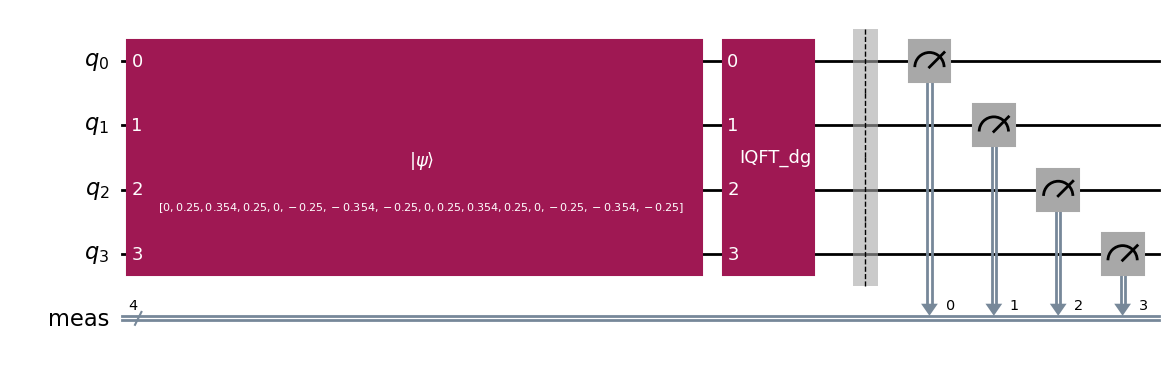

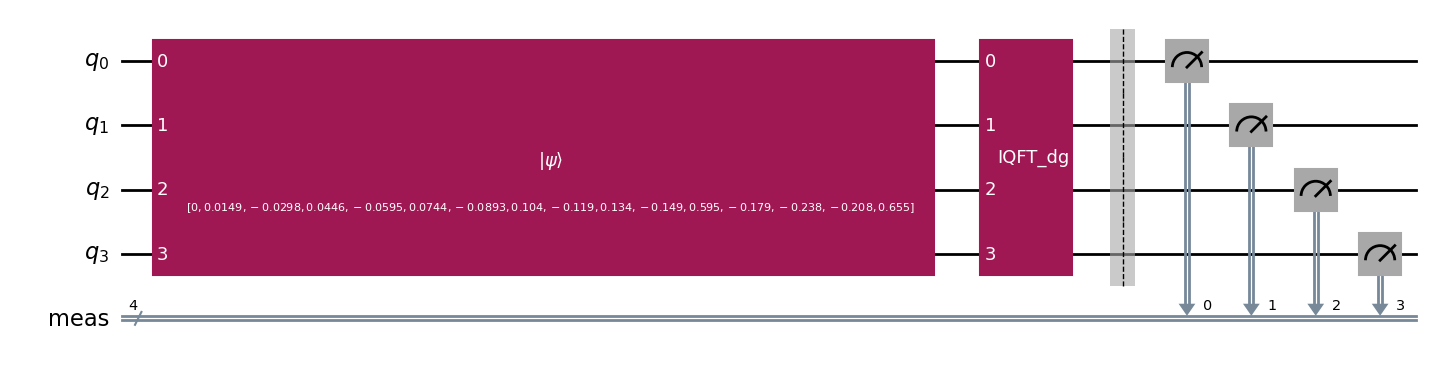

In [3]:
qc_exp_stwo = QuantumCircuit(n_qubits)
qc_exp_stwo.initialize(normalized_values_stwo, range(n_qubits))

qc_exp_seight = QuantumCircuit(n_qubits)
qc_exp_seight.initialize(normalized_values_seight, range(n_qubits))

qft_circuit_inverse_func = QFT(4,inverse = True)

qc_exp_stwo.compose(qft_circuit_inverse_func,inplace = True)
qc_exp_seight.compose(qft_circuit_inverse_func,inplace = True)

qc_exp_stwo.measure_all()
qc_exp_seight.measure_all()

display(qc_exp_stwo.draw('mpl',fold=-1))
display(qc_exp_seight.draw('mpl',fold=-1))

In [4]:
backend = AerSimulator()

qc_exp_stwo_trans = transpile(qc_exp_stwo, backend=backend)
qc_exp_seight_trans = transpile(qc_exp_seight,backend=backend)

In [5]:
result_stwo= backend.run(qc_exp_stwo_trans,shots = 9600).result()
result_seight = backend.run(qc_exp_seight_trans,shots = 9600).result()

2:

Measurement counts: sin(2x) = {'1110': 4812, '0010': 4788}, sin(8x) = {'1001': 351, '0011': 832, '1100': 1207, '1011': 594, '0010': 141, '1000': 2942, '0100': 1219, '0111': 362, '0000': 183, '1101': 863, '0101': 627, '1110': 151, '1111': 48, '0110': 21, '0001': 42, '1010': 17}
sin(2x)


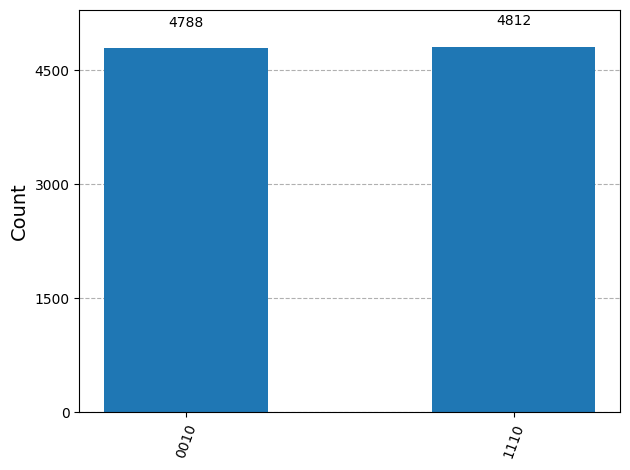

sin(8x)


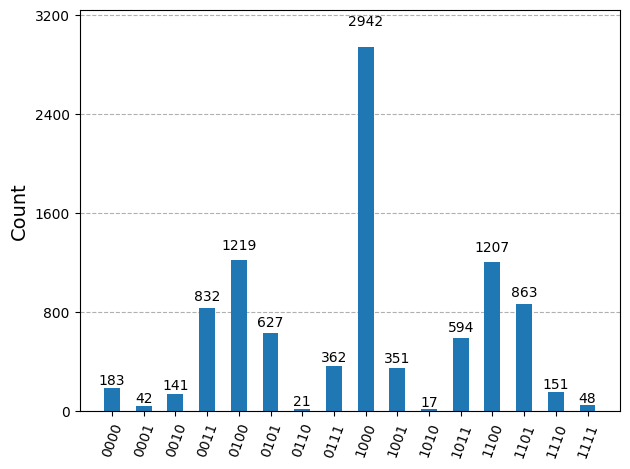

In [6]:
counts_stwo = result_stwo.get_counts()
counts_seight = result_seight.get_counts()

print(f"Measurement counts: sin(2x) = {counts_stwo}, sin(8x) = {counts_seight}")

print("sin(2x)")

display(plot_histogram(counts_stwo))

print("sin(8x)")

display(plot_histogram(counts_seight))

3. The histogram of $\sin(2x)$ shows a peak at 2 and 14. When we are generating the initial quantum state list from the x = np.linspace(0,2*np.pi, num_points, endpoint=False) fuction domain, we are essentially sampling the function $f(x)$ at discrete points in range. In this case these points are $x_k = \frac{2 \pi k}{16}$ where $k \in \{0,1,2,3 \dots 15\}$. 

Set created is $\{f(x_k)\}$. For $\sin(14x)$ we get $\{\sin(14 * \frac{2 \pi k}{16})\} = {\sin(\frac{7 \pi k}{4})} = \{ - \sin(\frac{\pi k}{4})\}$. With the same procees for $\sin(2x)$ we get $\{\sin(\frac{\pi k}{4})\}$. 

Hence, since both functions give set with exact same frequency sin wave when we take discrete samples, but just "rotating" in the opposite sense, the fourier transform gives both frequency values as both are valid frequency terms for the sampl set.

4. Technically, sampling of $\sin(8x)$ in entire sample domain should yeild the entire set $\{sin(8x_k)\} = \{0,0,0...0\}$, since our sampling points are $x_k = \frac{\pi k}{8}$, and by seeing DFT formula it should give all frequency components 0. But because of pythons 'floating point' errors we get very small values like: (since python cant accuratly store floating point data and calculations with it can be slightly off)

In [7]:
print(function_values_seight)

[ 0.00000000e+00  1.22464680e-16 -2.44929360e-16  3.67394040e-16
 -4.89858720e-16  6.12323400e-16 -7.34788079e-16  8.57252759e-16
 -9.79717439e-16  1.10218212e-15 -1.22464680e-15  4.89982516e-15
 -1.46957616e-15 -1.96067284e-15 -1.71450552e-15  5.38968388e-15]


See how all of these are $10^{-15}, 10^{-16}$ like terms very close to 0, but due to normalization we get some decently sized values:

In [8]:
print(normalized_values_seight)

[ 0.          0.01487571 -0.02975142  0.04462714 -0.05950285  0.07437856
 -0.08925427  0.10412999 -0.1190057   0.13388141 -0.14875712  0.59517887
 -0.17850855 -0.23816177 -0.20825997  0.65468171]


Becuase of normalisation we get a sampling set which is fed into our circuit. Looking at the data set, we cant really see any pattern that resembles any frequency. I feel like the peaks we see at frequency 8,4,12 are kind of arbitrary and arrise because python decided to make floating point errors that way, and that there is nothing special in that. 

Technically: (forward DFT equivalent to inverse Quantum DFT)

$$X_k = \sum_{n = 0}^{N-1} f(x_k) e^{- \frac{2 j \pi k n}{N}}$$

Where $X_k$ is the frequency amplitude we see correlated in the histogram. For all $x_k = k \pi/8$, we should have gotten $X_k = 0$  $\forall$ $ k \in \{0,1,2,...,15\}$. The data we have gotten seems like a result of pythons floating point errors, and I dont think we can arrise at any conclusions from the data. 

Instead, it would be better if we sampled at values $x_k = \frac{k \pi}{8} + \delta$ where delta is some small offset, so that we wount get all zero values.

sin(8x) with delta


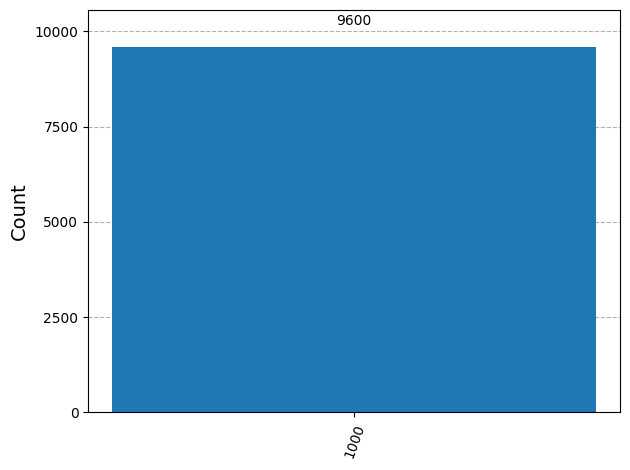

In [9]:
x = np.linspace(0,2*np.pi, num_points, endpoint=False) #16 sample points

x = list(x)

delta = np.pi/21 #small delta shift in sampling points

for i in range(len(x)):
    x[i] = float(x[i]) + delta

x = np.linspace(x[0], x[-1], num=len(x), endpoint=True)

delta_added = np.sin(8*x)

normalized_delta_added = delta_added/np.linalg.norm(delta_added) 

qc_delta = QuantumCircuit(n_qubits)

qc_delta.initialize(normalized_delta_added, range(n_qubits))

qc_delta.compose(qft_circuit_inverse_func,inplace = True)

qc_delta.measure_all()

qc_delta_transpile = transpile(qc_delta, backend=backend)

result_delta= backend.run(qc_delta_transpile,shots = 9600).result()

counts_delta = result_delta.get_counts()

print("sin(8x) with delta")

display(plot_histogram(counts_delta))

We see that with a delta added to ensure sampling occurs at points where $\sin(8x)$ gives non zero sample outputs, our circuit PERFECTLY yeilds frequency 8 as the only present frequency. (since 8 is symmetric with sampling points 16, we dont get "double" frequency measurements like in case of $\sin(2x)$)

5. Amplitude encoding is when we have a set of $2^n$ data points forming set $\{x_k\}$ which we represent with $n$ qubits as:

$$\vert data \rangle = \frac{1}{norm(x_k)} \sum_{i} x_k \vert i \rangle $$

This nice nice but falls short in practical implementation. Like its hard to arbitrarily tell a circuit to make some random arbitrary quantum state with precise amplitude probabilites. It usually takes many circuit gates to achieve this with precision and hence noise can have a large effect on the wave function state. Not practical.

### Alternatives:

1. Angle/Rotation encoding: This requires for more qubits than amplitude encoding but is good in the fact that we can easily denote any continious data value with the qubits, with a very shallow circuit. the basic procedure is that we take out data set $\{x_i\}$ of size $N$ and use $N$ qubits, each rotated by value $x_i$ in some axis. This is accurate since we are able to create very precise rotation gates. 

Example:

$$\vert \psi_{final} \rangle = (R_y(x_1)\vert 0 \rangle) \otimes (R_y(x_2)\vert 0 \rangle) \otimes (R_y(x_3)\vert 0 \rangle) \otimes \dots (R_y(x_N)\vert 0 \rangle) $$


In [10]:
#example with sampling of sin(8x) at 16 points:

normalized_values = function_values_seight/np.linalg.norm(function_values_seight)
print(normalized_values)

[ 0.          0.01487571 -0.02975142  0.04462714 -0.05950285  0.07437856
 -0.08925427  0.10412999 -0.1190057   0.13388141 -0.14875712  0.59517887
 -0.17850855 -0.23816177 -0.20825997  0.65468171]


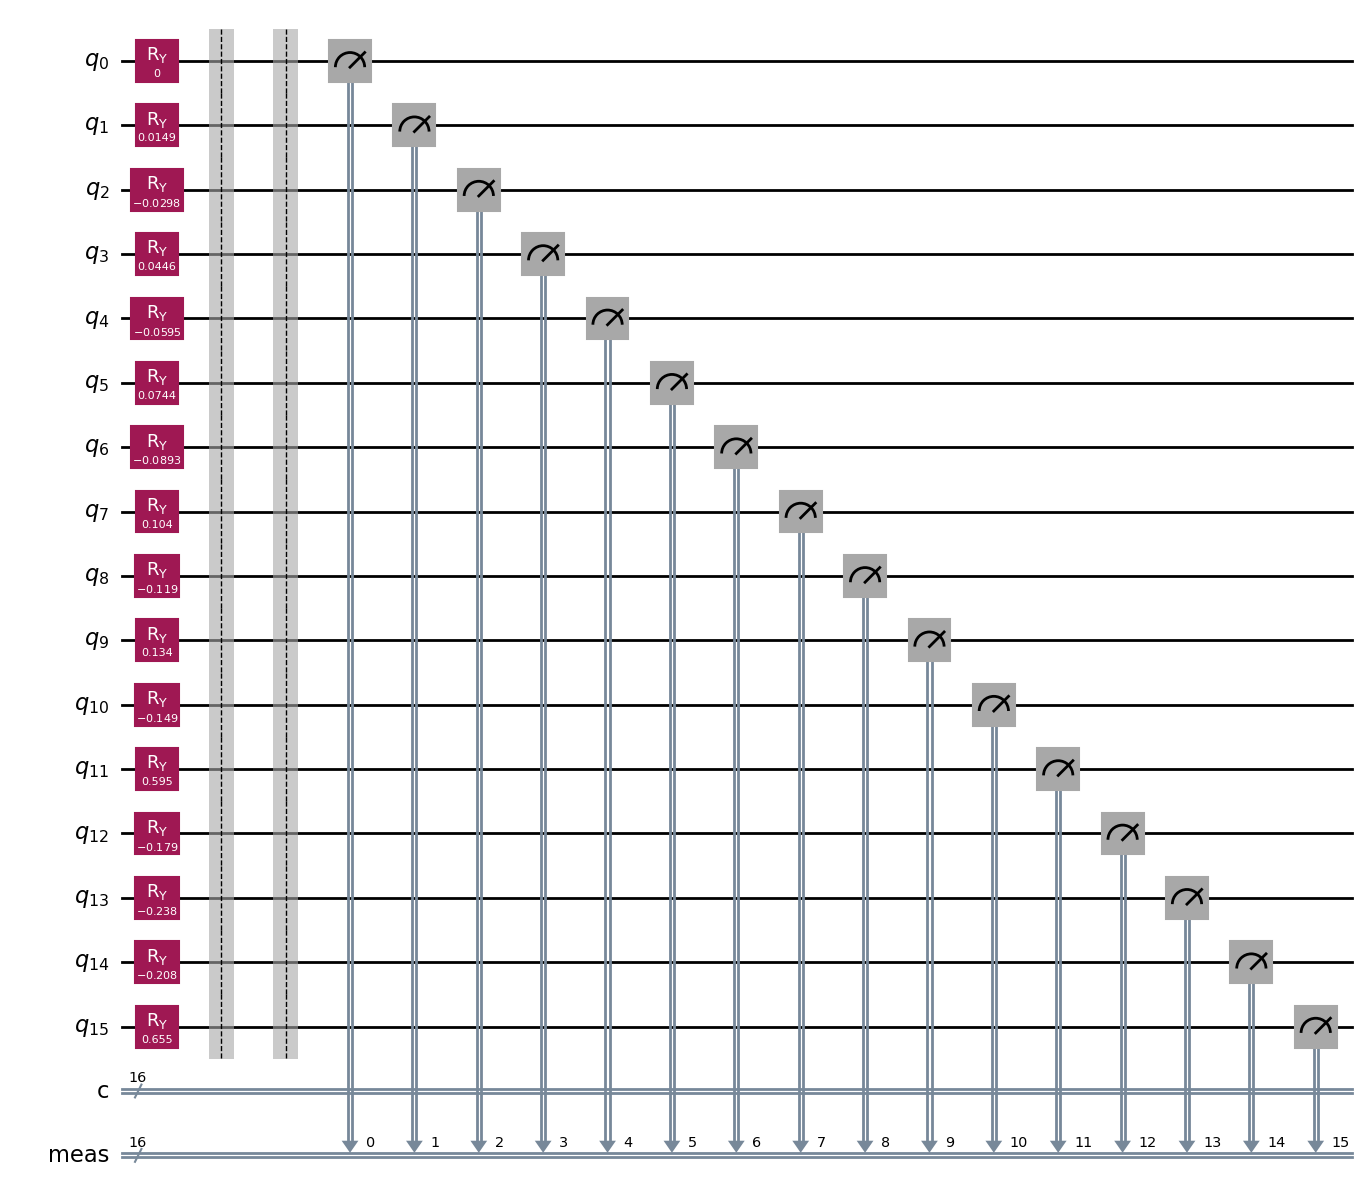

In [11]:
angle_encoding = QuantumCircuit(len(normalized_values), len(normalized_values)) #same number of qubits

for i in range(len(normalized_values)):
    angle_encoding.ry(normalized_values[i],i)

angle_encoding.barrier()
angle_encoding.measure_all()

angle_encoding.draw('mpl')

Very shallow circuit above. not much noise, better when we care about accuracy more.

One drawback with this method is that since rotation functions are periodic with period $2 \pi$, we cant really diffrentiate between like $3 \pi$ and $\pi$. Hence should ensure data is normalized so that it dosent exceed bounds or should wrap data such that it $\in (0,2\pi)$.

Another drawback is that it scales horribly. For a set of length $N$, amplitude encoding scales as $O(\log_2(N))$ but rotation encoding scales as $O(N)$ directly. Hence this method can only be used for small data sets where accuracy is far more important. 

### Part 2: Phase estimation

1. Phase estimation is used for unitary matrices who *all* have eigenvalues of form $e^{2 \pi i \theta}$ and $\theta \in [0,1)$ is what we are to find. Gate operations of the form $e^{ix}$ are all periodic operations with period $2 \pi$. We know $\theta < 4$ but *any* value of $\theta > 1$ will wrap back around to $\in (0,1)$ since $e^{2 \pi i \theta}$ has period of 1. Due to this we define some $\phi = 2 \pi \frac{\theta}{4}$ and do phase estimation with $e^{2 \pi i \frac{\theta}{4}}$. Later we multiply value obtained of $\theta/4$ term by 4 to get $\theta$.

If we were to do direct phase estimation with $\theta$ we would get some value $ \theta_0 \in (0,1)$ but this would be ambigious since actual theta can be any $\theta = \theta_0 + n$ provided $n$ is an integer and $\theta < 4$.

The $U$ gate for modified angle variable is $e^{2 \pi i H} = \begin{bmatrix}1 & 0 \\ 0 & e^{i \phi} \end{bmatrix}$. This is a controlled phase gate and we can implement it.

The method i've used below is the one i learnt through QGSS-2025

In [12]:
import base64

with open("theta.txt", "r") as f:
    encoded_theta = f.read()

theta = float(base64.b64decode(encoded_theta).decode())

print(f"Target theta to estimate: {theta}")

#Since theta not bounded to (0,2pi) we have to create a new angle phi which is proportional to theta. This phi will create the gate U from which we measure phi with phase estimation. We then back-calculate theta from the relation:

phi = (2 * np.pi * theta) / 4 #to ensure phase in (0,2pi)

U = QuantumCircuit(1)

U.p(phi,0) #make the phase gate which is our e^2 pi i H

U_gate = U.to_gate() #"export" as gate


Target theta to estimate: 2.75


Let:

$$\frac{\phi}{2 \pi} \approx \frac{y}{2^n}$$

for some $y \in \{0,1,2,3,4, \dots 2^n - 1\}$

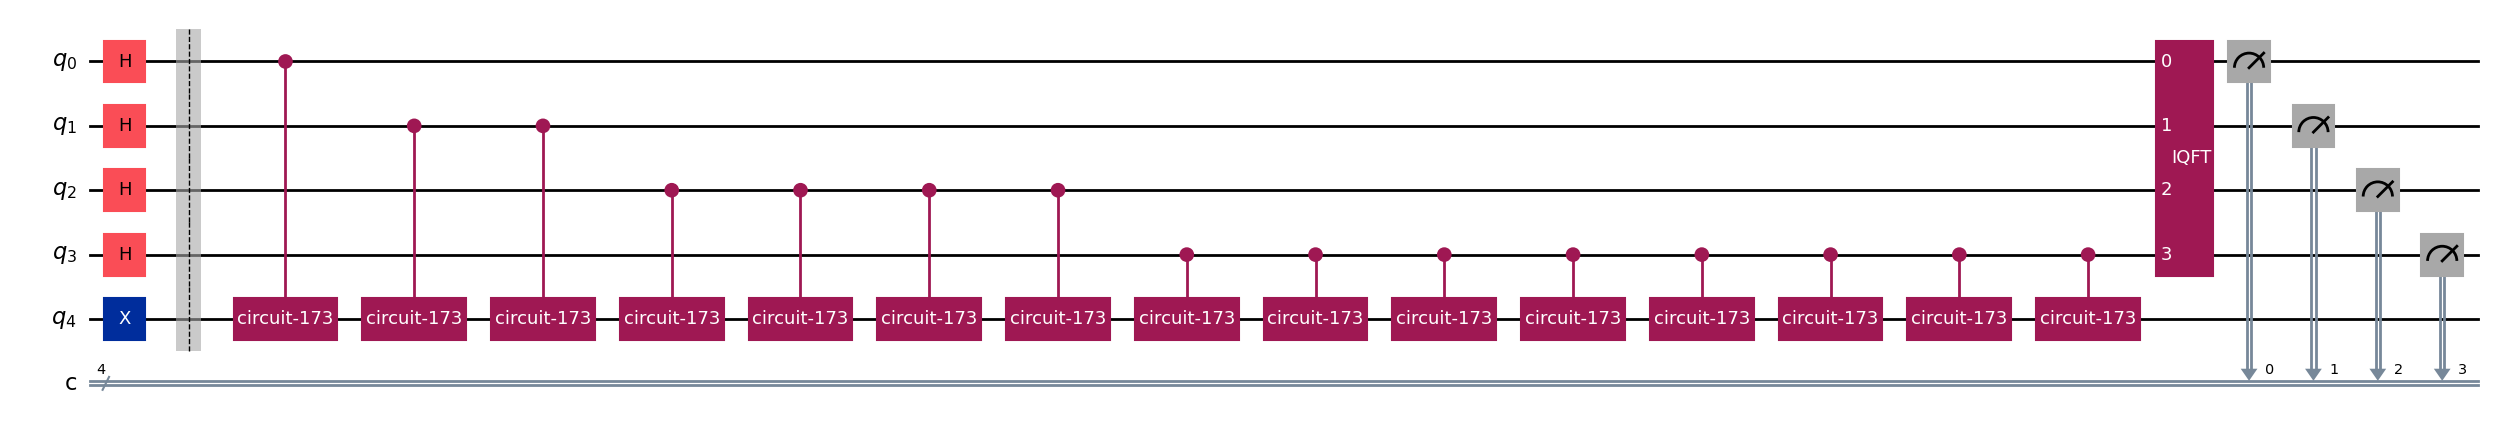

In [13]:
def generate_phase_estimate_circuit(n,U):
    qc= QuantumCircuit(n+1,n)

    #prepare controlled U
    cU = U.control(1)

    #prepare eigenvectir state |1> of which we are to find eigenvector 
    qc.x(n)
    
    for i in range(n):
        qc.h(i)

    qc.barrier()

    for i in range(n):
        for j in range(2**i):
            qc.append(cU,[i,n])

    inv_QFT = QFT(n,inverse=True)

    qc.append(inv_QFT,range(n))

    qc.measure(range(n),range(n))

    return qc

n = 4

phase_estimate = generate_phase_estimate_circuit(n,U_gate)

phase_estimate.draw('mpl',fold = -1)


{'1011': 9600}


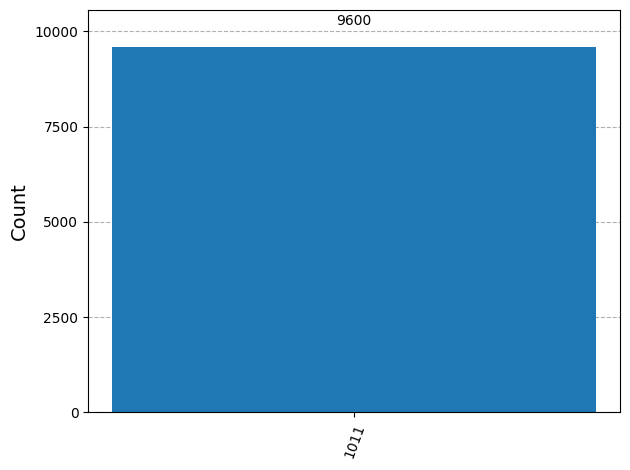

In [14]:
backend = AerSimulator()

transpile_phase_estimate = transpile(phase_estimate,backend=backend)

shots = 9600

results = backend.run(transpile_phase_estimate,shots=shots).result()

counts = results.get_counts()

print(counts)

plot_histogram(counts)

In [15]:
measured_bin = max(counts, key=counts.get)

phase_estimate = int(measured_bin, 2) / (2**n)

theta_est = 4 * phase_estimate

print(f"theta = {theta_est}")

theta = 2.75


We can see than with depth of 3 (total $2^3 = 8$ basis states) we can correctly identify $\theta$ as 2.75.

## Shor's Algorithm
First lets build the circuit

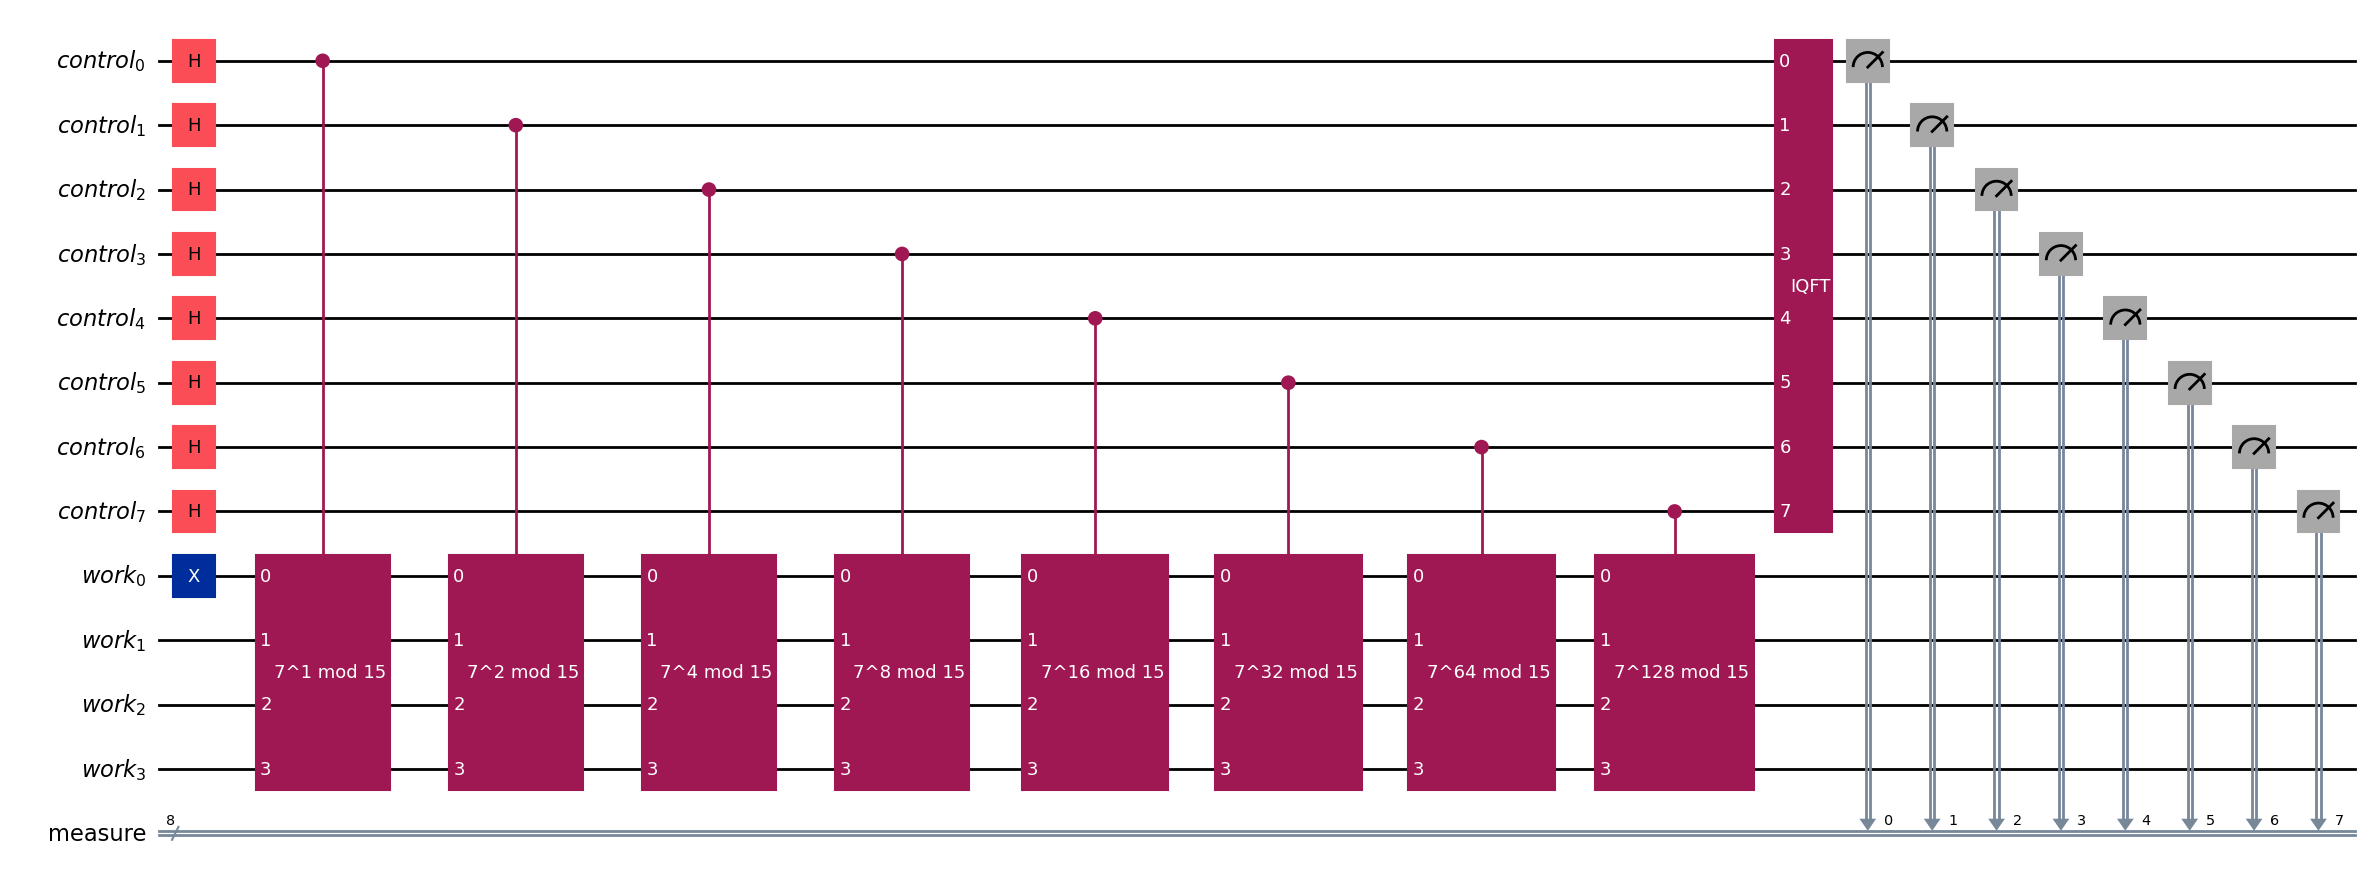

In [16]:
from qiskit import QuantumRegister, ClassicalRegister

#let the a= 7
a = 7
N = 15

n_work = 4    
n_control = 2*n_work   
qr = QuantumRegister(n_work, name='work')
qr2 = QuantumRegister(n_control, name='control')
cr = ClassicalRegister(n_control, name='measure')
qc_shor = QuantumCircuit(qr2, qr, cr)

qc_shor.x(n_control)

for qubit in range(n_control):
    qc_shor.h(qubit)

def c_amod15(a, power):
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13") # a & N must be co-prime
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

for q in range(n_control):
    qc_shor.append(c_amod15(a, 2**q),[q] + [i+ n_control for i in range(4)])

qc_shor.append(QFT(n_control, inverse=True), range(n_control))

qc_shor.measure(range(n_control), range(n_control))
qc_shor.draw('mpl',fold=-1)

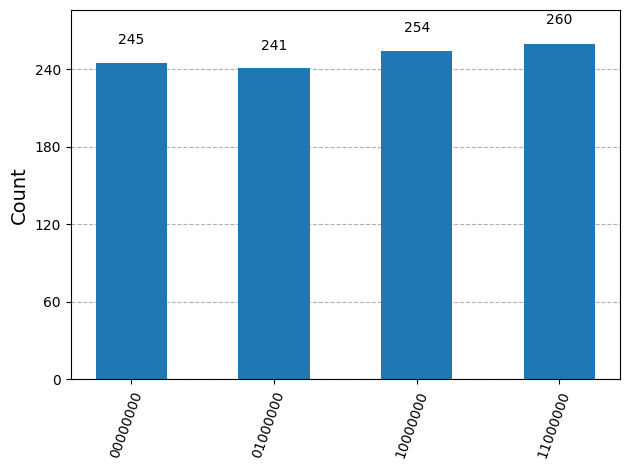

In [17]:
backend = AerSimulator()
compiled_qc_shor = transpile(qc_shor, backend)
result = backend.run(compiled_qc_shor, shots=1000).result()
counts = result.get_counts()

plot_histogram(counts)

In [18]:
import pandas as pd

rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # binary to dec
    phase = decimal/(2**n_control)  # eigenvalue
    measured_phases.append(phase)
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",f"{decimal}/{2**n_control} = {phase:.2f}"])
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  01000000(bin) =  64(dec)   64/256 = 0.25
1  11000000(bin) = 192(dec)  192/256 = 0.75
2  10000000(bin) = 128(dec)  128/256 = 0.50
3  00000000(bin) =   0(dec)    0/256 = 0.00


In [19]:
from fractions import Fraction

rows = []
candidate = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)  
    candidate.append(frac.denominator)
    rows.append([phase,
                 f"{frac.numerator}/{frac.denominator}",
                 frac.denominator])
# Primt table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.25      1/4            4
1   0.75      3/4            4
2   0.50      1/2            2
3   0.00      0/1            1


In [20]:
factors = []

for r in candidate:
    print(f"For r = {r}")
    if r % 2 == 0:
        candidates = [np.gcd(a ** (r // 2) - 1, N), np.gcd(a ** (r // 2) + 1, N)]
        for k in [int(c) for c in candidates if c not in [1,N]]:
            if k not in factors:
                factors.append(k)

        print("Factors of 15:", [int(c) for c in candidates if c not in [1, N]])
    else:
        print("Period 'r' is odd. Try another 'a'.")

print()

print(f"Final factors are: {factors}") #final factors

For r = 4
Factors of 15: [3, 5]
For r = 4
Factors of 15: [3, 5]
For r = 2
Factors of 15: [3]
For r = 1
Period 'r' is odd. Try another 'a'.

Final factors are: [3, 5]


In [21]:
phi_of_N = (factors[0]-1)*(factors[1]-1)

print("phi(N) = ", phi_of_N)

e = 7 #given value

d = pow(e, -1, phi_of_N) #da function

print("d = " ,d)

cipherText = [14,9,12,5]

decypher = []

for c in cipherText:
    decypher.append((c**d)%15)

print(decypher)

for code in decypher:
    print(chr(code + 64),end='')

phi(N) =  8
d =  7
[14, 9, 3, 5]
NICE

Nice indeed yay.